# Projeto 2 - NLP

-----

Nome:  
Turma:

Os segundo projeto do módulo de Dados não estruturados II será focado no processamento de linguagem natural! Usaremos os algoritmos aprendidos e as técnicas vistas na segunda parte do curso para extrairmos informações relevantes de texto. Mais precisamente, de publicações no Twitter.

## Os Dados

Utilizaremos um Dataset obtido do Twitter com 100K postagens entre os dias 01/08/2018 e 20/10/2018. Cada postagem é classificada como **positiva**, **negativa** ou **neutra**.  

Dois arquivos serão disponilizados para o desenvolvimento dos modelos, um para treino/validação e outro para submissão. Os arquivos se encontram na pasta */Dados/train* e */Dados/subm*, respectivamente.

Descrição das colunas:

- **id**: ID único para o tweet  
- **tweet_text**: Texto da publicação no Twitter  
- **tweet_date**: Data da publicação no Twitter  
- **sentiment**: 0, se negativo; 1, se positivo; 2, se neutro  
- **query_used**: Filtro utilizado para buscar a publicação

## O Problema

Você deverá desenvolver um modelo para detectar o sentimento de uma publicação do Twitter a classificando em uma das três categorias: **positiva**, **negativa** ou **neutra**. O texto da publicação está disponível na coluna "tweet_text". Teste pelo menos 2 técnicas de NLP diferentes e escolha a métrica de avaliação que julgar mais pertinente.  

Escolha o melhor modelo e gere uma base a partir dos dados de submissão, que estão no caminho ```Dados/subm/Subm3Classes.csv```, com o seguinte formato:


|id|sentiment_predict
|-|-|
|12123232|0
|323212|1
|342235|2

Salve essa tabela como um arquivo csv com o nome ```<nome>_<sobrenome>_nlp_degree.csv``` e submeta-o como parte da entrega final do projeto.  

Para ajudar no desenvolvimento, é possível dividir o projeto em algumas fases:

- **Análise de consistência dos dados**: analise se os dados estão fazendo sentido, se os campos estão completos e se há dados duplicados ou faltantes. Se julgar necessário, trate-os.    


- **Análise exploratória**: analise a sua base como um todo, verifique o balanceamento entre as classes e foque, principalmente, na coluna ```tweet_text```.    


- **Pré-processamento e transformações**: projetos de NLP exigem um considerável pré-processamento. Foque no tratamento da string do texto. Procure começar com tratamentos simples e adicione complexidade gradualmente. Nessa etapa você testará diferentes técnicas de transformações, como o Bag Of Words e o TF-IDF.    


- **Treinamento do modelo**: depois das transformações, você poderá executar o treinamento do modelo classificador. Nessa etapa o problema se torna semelhante aos abordados nos módulos anteriores. Você pode testar diversos classificadores como RandomForest, AdaBoost, entre outros. Otimize os hiperparâmetros do modelo com técnicas como a GridSearch e a RandomizedSearch.    


- **Conclusões**: descreva, em texto, as conclusões sobre os seus estudos. O modelo é capaz de identificar o sentimento das publicações? É possível extrapolar o modelo para outros contextos, como a análise de sentimento de uma frase qualquer? Pense em questões pertinentes e relevantes que você tenha obtido durante o desenvolvimento do projeto!     



## Critérios de avaliação

Os seguintes itens serão avaliados:

1. Desenvolvimento das etapas descritas acima;


2. Reprodutibilidade do código: seu código será executado e precisa gerar os mesmos resultados apresentados por você;


3. Clareza: seu código precisa ser claro e deve existir uma linha de raciocínio direta. Comente o código em pontos que julgar necessário para o entendimento total;


4. Justificativa das conclusões obitdas: não existirá certo ou errado, mas as decisões e as conclusões precisam ser bem justificadas com base nos resultados obtidos.  

O desempenho do modelo **não** será considerado como critério de avaliação.  

## Informações gerais

- O projeto deve ser desenvolvido individualmente ou em grupo;



- Entrega através do Class: Processamento Digital de Imagens - Definições e Fundamentos
 -> Exercícios -> Projeto 2


Anexar, na entrega, o notebook de desenvolvimento e o arquivo .csv de submissão, da seguinte forma:  

Criar um arquivo zip com:
- notebook: ```<nome>_<sobrenome>_<númeroTurma>_projeto_2.ipynb```   
- csv: ```<nome>_<sobrenome>_<númeroTurma>_projeto_2_submissao.csv```


## Dicas

### Base de treino e submissão

A base de submissão não possui a variável de saída, portanto ela será utilizada **apenas** para gerar o arquivo que acompanha a submissão do projeto.      

### Tente encontrar possíveis vieses

É muito comum que modelos de NLP possuam fortes vieses, como a tendência de relacionar palavras específicas com alguma classe de saída. Tente encontrar vieses no seu estudo, isso pode ajudar a tirar boas conclusões. o campo "query_used" pode ser útil para essa análise.  

### O pré-processamento é a chave para um bom desempenho

Essa é a etapa que mais vai contribuir para o desempenho do seu modelo. Seja criativo e desenvolva essa etapa de uma maneira que seja fácil de aplicar o mesmo processamento para uma nova base, você terá que fazer isso para gerar a base de submissão.

-------

## 1. Eploração dos Dados:
Nesta estapa faramos a verificação de consistência dos dados, verificando inclusive quais estratégias a adotar de tivermos dados faltantes ou duplicados.

In [212]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv('Dados/train/Train3Classes.csv')
df.sample(10)

id                                         tweet_text  \
45278  1042181926210088961  “Minha mãe, fique certa. Eles ainda vão lhe pe...   
76550  1045461722696491008          @tyshpilots obrigada pelo apoio amor :))(   
26908  1046257569566793728  @awakimskjin XOFANNA SOCORRO QUE ATAQUE SURPRE...   
3228   1043530117681680384  China cancela visita a EUA e tensão comercial ...   
15723  1049145773538066433                              @ilovemyrimas poxa :(   
66459  1046956766934777857  @emmalcr1 :(( força!! (se serve de consolo, ne...   
62480  1045728015387262976  Estúdio VEJA - Prêmio Educador Nota 10 https:/...   
75853  1047456048616026114                    Tar perto de ti deixa-me bem :)   
8583   1049239098978910208  1 semana depois e estou a ficar pior da consti...   
32676  1049309275217117186                        @andreIccl NUNCA SABERÁ. :D   

                           tweet_date  sentiment query_used  
45278  Tue Sep 18 22:41:48 +0000 2018          2      exame  
76550  Thu Sep 27 23:54:33 +0000 2018          1         :)  
26908  Sun Sep 30 04:36:57 +0000 2018          0         :(  
3228   Sat Sep 22 15:59:02 +0000 2018          2      folha  
15723  Mon Oct 08 03:53:39 +0000 2018          0         :(  
66459  Tue Oct 02 02:55:19 +0000 2018          0         :(  
62480  Fri Sep 28 17:32:42 +0000 2018          2       veja  
75853  Wed Oct 03 11:59:17 +0000 2018          1         :)  
8583   Mon Oct 08 10:04:29 +0000 2018          1         :)  
32676  Mon Oct 08 14:43:21 +0000 2018          1         :)

In [3]:
df.shape

(95000, 5)

In [4]:
# Veirfica se temos dados faltantes ou nulos 
df.isnull().sum()

id            0
tweet_text    0
tweet_date    0
sentiment     0
query_used    0
dtype: int64

In [5]:
# Mostrar todos os valores possíveis das colunas query_used e sentiment

for i in ['query_used','sentiment']:
    print('\n',i,'\n',df[i].value_counts())


 query_used 
 :(               31696
:)               31678
folha             5004
estadao           3880
#fato             3471
g1                3439
exame             3417
#trabalho         3030
#oportunidade     2455
jornaloglobo      2374
veja              2141
#noticia          1114
#novidade          920
#curiosidade       381
Name: query_used, dtype: int64

 sentiment 
 0    31696
1    31678
2    31626
Name: sentiment, dtype: int64


In [6]:
df_plot = df
df_plot.sentiment.astype(np.object);

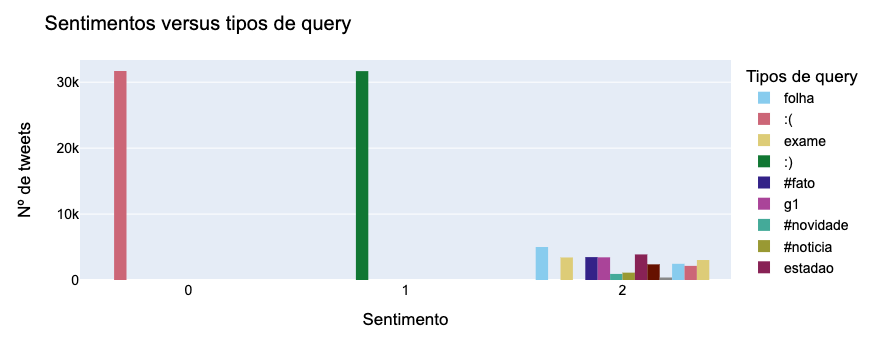

In [7]:

# Mostra o panoroma geral da nossa base de dado inclusive considerando os três sentimentos : O, 1 e 2 


import plotly.express as px

fig = px.histogram(df_plot, x='sentiment', color="query_used", barmode='group', 
                   color_discrete_sequence = px.colors.qualitative.Safe)



fig.update_layout(
    title = 'Sentimentos versus tipos de query',
    xaxis_title='Sentimento',
    yaxis_title='Nº de tweets',
    legend_title='Tipos de query',
    font=dict(
        family= 'Arial,san-serif',
        size=14,
        color='Black'
    )
)




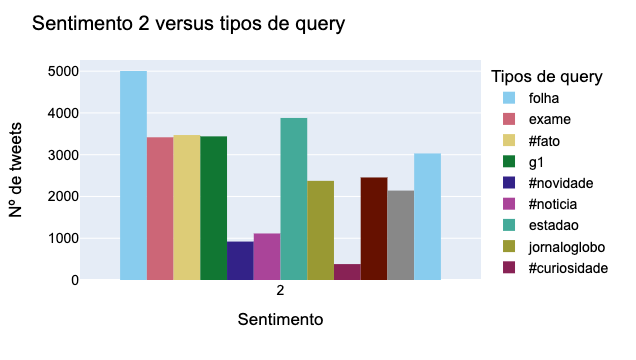

In [8]:
# Neste célula mostraremos mais detalhadamente o sentimento em relação queries usadas para caputrar
# sentimentos

fig = px.histogram(df_plot[df_plot['sentiment'] == 2], x='sentiment', color="query_used", barmode='group', 
                   color_discrete_sequence = px.colors.qualitative.Safe)



fig.update_layout(
    title = 'Sentimento 2 versus tipos de query',
    xaxis_title='Sentimento',
    yaxis_title='Nº de tweets',
    legend_title='Tipos de query',
    font=dict(
        family= 'Arial,san-serif',
        size=14,
        color='Black'
    )
)


Tendo os resultados da análise exploratória, majoritariamente os emojis :( e :) tem um viés para os sentimentos negativo e positivo respectivamente. Apesar disso, encotramos no sentimento 2 um misto de tendências. As hastags denotam um misto. Agora vamos analisar especificamente o sentimento 2.

In [9]:
# Tira uma amostra única de tweets segundo o tipo de query_used 
df.groupby('query_used', group_keys=False).apply(lambda x: x.sample(n  = 1, random_state = 1))


id                                         tweet_text  \
58288  1039211973538455553  #curiosidade: As 13 Maravilhas Culturais segun...   
67905  1036577116853350400  #Fato é que ninguém estava nem aí para o museu...   
24443  1030542293013614593  Pesquisa revela queda nos preços de produtos h...   
15203  1043155946187444225  CAMISA CORE 18 ADIDAS Carreiros Sports - A sua...   
54525  1032299647325405184  Supplier Quality Engineer - Jundiaí, SP https:...   
61641  1039313070265458688  #boanoite #Deus #fé #fe #acreditar #Cassilândi...   
36320  1046252086609022976  to mal, realmente mal, por ouvir q a minha pri...   
34550  1049307778286866435  @Yuu_Gazerock eu digo não é caro pq já ajudei ...   
87282  1043094991789338624  &gt;@EstadaoPolitica Polarização Bolsonaro-Had...   
52908  1040684366752636929  Furacão Florence causa 2 mortes na Carolina do...   
69591  1036846078522478592  Federer leva virada de australiano e está fora...   
72058  1049078103266545664  SENADO SP: Major Olimpio e Mara Gabrilli estão...   
91482  1041713387334299648  Quer abrir um negócio? Saiba mais sobre o MEI....   
35907  1050067401772027905  Bancos e Justiça farão mutirão para destravar ...   

                           tweet_date  sentiment     query_used  
58288  Mon Sep 10 18:00:16 +0000 2018          2   #curiosidade  
67905  Mon Sep 03 11:30:17 +0000 2018          2          #fato  
24443  Fri Aug 17 19:50:03 +0000 2018          2       #noticia  
15203  Fri Sep 21 15:12:13 +0000 2018          2      #novidade  
54525  Wed Aug 22 16:13:09 +0000 2018          2  #oportunidade  
61641  Tue Sep 11 00:42:00 +0000 2018          2      #trabalho  
36320  Sun Sep 30 04:15:10 +0000 2018          0             :(  
34550  Mon Oct 08 14:37:24 +0000 2018          1             :)  
87282  Fri Sep 21 11:10:00 +0000 2018          2        estadao  
52908  Fri Sep 14 19:31:02 +0000 2018          2          exame  
69591  Tue Sep 04 05:19:03 +0000 2018          2          folha  
72058  Sun Oct 07 23:24:45 +0000 2018          2             g1  
91482  Mon Sep 17 15:40:00 +0000 2018          2   jornaloglobo  
35907  Wed Oct 10 16:55:52 +0000 2018          2           veja

In [10]:
df_2 = df.loc[df['sentiment'] == 2]
df_2.sample(n = 10 , random_state = 1)

id                                         tweet_text  \
46601  1040235475804532737  O "Mercado de Noivos" na Praça do Povo em Shan...   
88010  1047220182945546240  'Devemos proferir decisão que represente ansei...   
73946  1050045667043729408  Furacão Michael avança na Flórida com ventos d...   
23031  1039176674913349633  Sociólogo e cientista político Helio Jaguaribe...   
33337  1041003711168864256  Zapping: A Fazenda: Veja 12 dos 16 nomes confi...   
12536  1043181068810104832  Russos fizeram plano para tirar Assange de emb...   
63800  1049830624733745152  James Gunn, demitido da Marvel, fará roteiro d...   
21741  1033003724325756928  #Vaga para Balconista de Material Elétrico det...   
57573  1039464569305845760  Sonegação do FGTS cresce; trabalhador deve fic...   
53388  1032772089332330496  When it’s Friday and you arrive to work 🌈🇳🇿❤️ ...   

                           tweet_date  sentiment     query_used  
46601  Thu Sep 13 13:47:18 +0000 2018          2   #curiosidade  
88010  Tue Oct 02 20:22:02 +0000 2018          2          folha  
73946  Wed Oct 10 15:29:30 +0000 2018          2          exame  
23031  Mon Sep 10 15:40:00 +0000 2018          2          folha  
33337  Sat Sep 15 16:40:00 +0000 2018          2          folha  
12536  Fri Sep 21 16:52:02 +0000 2018          2          folha  
63800  Wed Oct 10 01:15:00 +0000 2018          2             g1  
21741  Fri Aug 24 14:50:54 +0000 2018          2  #oportunidade  
57573  Tue Sep 11 10:44:00 +0000 2018          2             g1  
53388  Thu Aug 23 23:30:28 +0000 2018          2      #trabalho

**Fazendo uma análise das palavras mais presentes nos tweets por tipo de sentimento**

* Foi estabelecido que a melhor amostra para conseguirmos processar os nossos sentimentos seria verificar as palavras mais presentes nos tweets de sentimento 2, 1 e  0 . Isso pode nos mostrar algo mais palpável para conseguirmos mostrar os resultados. A escolha for amostrar 383, usando teoria de estatística, tweets de cada sentimento para termos uma noção da mais clara.

In [11]:
tweets = df.groupby('sentiment', group_keys=False).apply(lambda x: x.sample(n = 383, random_state = 1, replace = True))

tweets.groupby('sentiment', group_keys=False).apply(lambda x: x.sample(n = 1, random_state = 1))

id                                         tweet_text  \
41125  1046772961166864384           Infelizmente eu realmente sou imbecil :(   
41392  1045459926892646400  Porque ninguém mais usa o &gt; :D &lt; nas fra...   
80438  1045447022520815619  Ana Paula apresentou Niterói aos alunos: ‘Temo...   

                           tweet_date  sentiment query_used  
41125  Mon Oct 01 14:44:56 +0000 2018          0         :(  
41392  Thu Sep 27 23:47:24 +0000 2018          1         :)  
80438  Thu Sep 27 22:56:08 +0000 2018          2       veja

In [12]:
# Mostra as palavras mais comuns em cada sentimento sem as stopwords
import nltk
from nltk import word_tokenize, TweetTokenizer

from nltk.probability import FreqDist
import urllib.request
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from bs4 import BeautifulSoup
from nltk.corpus import stopwords

tt =TweetTokenizer()

tweets['tweet_text'].apply(lambda x: x.lower())
tweets['tweet_token_no_stopword'] = tweets['tweet_text'].apply(lambda x: tt.tokenize(x))
tweets.sample(5, random_state = 1)

id                                         tweet_text  \
44965  1045379084455415808  O ricardo vem ca para casa e o meu irmão vem l...   
11786  1037030071515705346  Duro de Matar 6 | Sequência com Bruce Willis g...   
15721  1047407265505050624  gente vcs que ja têm título de eleitor, em que...   
76281  1045366044771201025         @Coelha128 @afonsolima26 Vocês também :)))   
46502  1047199539424186369  Sintonia Eleitoral é uma ferramenta que compar...   

                           tweet_date  sentiment query_used  \
44965  Thu Sep 27 18:26:10 +0000 2018          1         :)   
11786  Tue Sep 04 17:30:10 +0000 2018          2   #noticia   
15721  Wed Oct 03 08:45:26 +0000 2018          1         :)   
76281  Thu Sep 27 17:34:21 +0000 2018          1         :)   
46502  Tue Oct 02 19:00:00 +0000 2018          2         g1   

                                 tweet_token_no_stopword  
44965  [O, ricardo, vem, ca, para, casa, e, o, meu, i...  
11786  [Duro, de, Matar, 6, |, Sequência, com, Bruce,...  
15721  [gente, vcs, que, ja, têm, título, de, eleitor...  
76281  [@Coelha128, @afonsolima26, Vocês, também, :),...  
46502  [Sintonia, Eleitoral, é, uma, ferramenta, que,...

In [13]:
# remover as stopwors 



stop_words = stopwords.words('portuguese')

tweets['tweet_token_no_stopword'].apply(lambda x: [word for word in x if word not in stop_words])
tweets['tweet_token_no_stopword'].apply(lambda x: [word for word in x if word.isalpha()])

tweets.sample(5, random_state = 1)





id                                         tweet_text  \
44965  1045379084455415808  O ricardo vem ca para casa e o meu irmão vem l...   
11786  1037030071515705346  Duro de Matar 6 | Sequência com Bruce Willis g...   
15721  1047407265505050624  gente vcs que ja têm título de eleitor, em que...   
76281  1045366044771201025         @Coelha128 @afonsolima26 Vocês também :)))   
46502  1047199539424186369  Sintonia Eleitoral é uma ferramenta que compar...   

                           tweet_date  sentiment query_used  \
44965  Thu Sep 27 18:26:10 +0000 2018          1         :)   
11786  Tue Sep 04 17:30:10 +0000 2018          2   #noticia   
15721  Wed Oct 03 08:45:26 +0000 2018          1         :)   
76281  Thu Sep 27 17:34:21 +0000 2018          1         :)   
46502  Tue Oct 02 19:00:00 +0000 2018          2         g1   

                                 tweet_token_no_stopword  
44965  [O, ricardo, vem, ca, para, casa, e, o, meu, i...  
11786  [Duro, de, Matar, 6, |, Sequência, com, Bruce,...  
15721  [gente, vcs, que, ja, têm, título, de, eleitor...  
76281  [@Coelha128, @afonsolima26, Vocês, também, :),...  
46502  [Sintonia, Eleitoral, é, uma, ferramenta, que,...

In [14]:
# fazer o grafico de frequência das palavras e mostrar as mais comuns 
'''
    Construi um dicinários com as palavras presentes na coluna tweet_token_no_stopword de cade sentimento

'''
words_sentiment ={}
sentimentos = [f'sentimento_{i}' for i in range(0,3)]
for i in range(0,3):
    words_sentiment[sentimentos[i]] = [ palavra for frase in tweets[tweets['sentiment'] == i]['tweet_token_no_stopword'] 
                                                for palavra in frase]

print('Sentimento 0: ', words_sentiment['sentimento_0'][::10])
print('Sentimento 1: ', words_sentiment['sentimento_1'][::10])
print('Sentimento 2: ', words_sentiment['sentimento_2'][::10])





Sentimento 0:  ['minha', '(', '.', 'basta', ',', 'que', 'qualquer', 'como', 'alimentação', 'a', 'leitura', 'que', 'Eu', 'músicas', 'Tá', ',', 'sana', 'por', 'não', 'quero', '?', 'cielo', 'n', 'foi', 'com', 'país', 'mim', 'Que', 'suas', 'triste', 'tudo', 'muito', 'pessoas', 'idiota', 'me', 'vas', ':(', ':(', 'preocupei', '@_rdesh', '@Munqueisa', 'pq', 'to', 'está', '@ddfelipi', ':(', 'se', 'me', 'será', 'só', '(', 'pra', 'Não', 'whatsapp', 'pé', 'miguelzinhoo', 'ela', ':(', '@CdNLeon', ':(', 'valtinho', 'quero', 'coitada', '@sadfemal3', 'tô', 'eu', 'cu', ',', 'a', 'pelo', 'votei', 'tô', ':(', 'não', 'com', '@RuiVF8', 'de', 'amiga', 'nunca', '?', 'ja', 'cedo', '?', 'q', ':(', 'gente', 'briga', 'Ja', ':(', 'https://t.co/lhpX0WscDJ', 'tenho', 'com', 'quando', 'mamo', 'o', ':(', 'amo', 'alguém', 'era', 'vei', 'parte', 'nao', 'com', '@senioriiity', 'meu', 'ainda', 'nem', 'mas', 'a', ':(', 'galera', 'embora', 'vendo', 'cidade', 'nem', 'acaba', 'como', 'das', 'esse', 'To', 'minha', 'pq', 'mesm

In [15]:
def print_freq_word(lista_palavras):
    
    '''
        Esta função vai plotar uma nuvem de palavras com base na lista de palavras passada como parâmetro e 
        também o grafico com os 10 itens mais frequentes na lista de palavras
    '''

    fdist = FreqDist(lista_palavras)

    # Colocando as 10 palavras mais comuns
    fdist.plot(10)
    plt.show()
    wordcloud = WordCloud(background_color='black',colormap='OrRd').generate( " ".join(lista_palavras) )

    # Plotando a nuvem
    plt.figure(figsize = (12, 12))
    plt.imshow(wordcloud)

    #Removendo os eixos
    plt.axis("off")
    plt.show()
   


O gráfico de frequências  e a representação em nuvens de palavras do sentimento 0 é : 

 


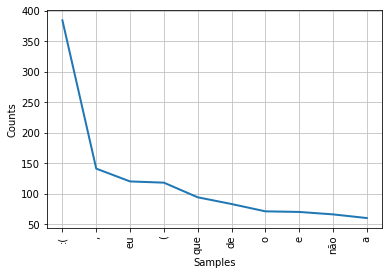

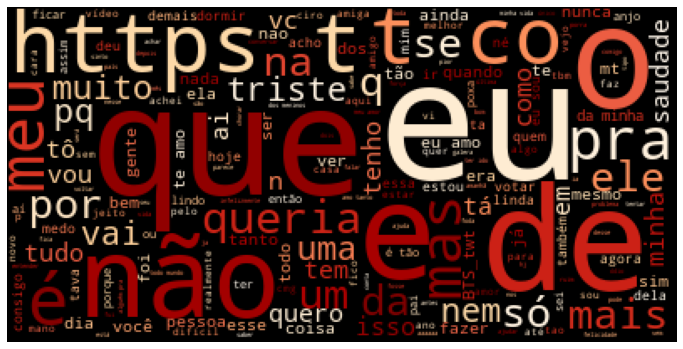





O gráfico de frequências  e a representação em nuvens de palavras do sentimento 1 é : 

 


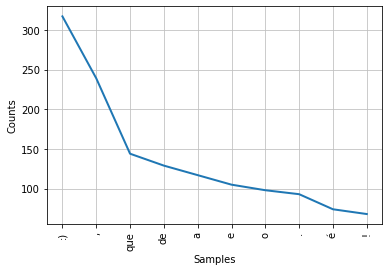

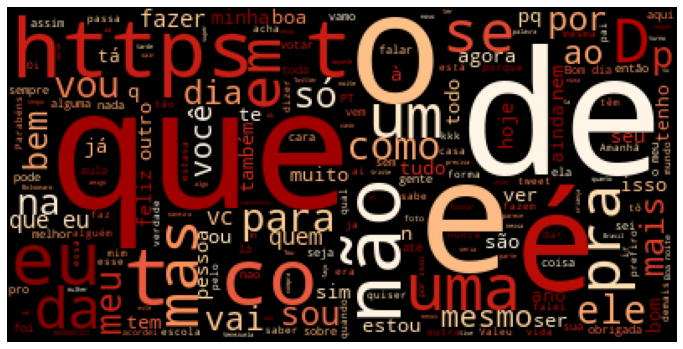





O gráfico de frequências  e a representação em nuvens de palavras do sentimento 2 é : 

 


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning:

Glyph 129315 missing from current font.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning:

Glyph 129315 missing from current font.



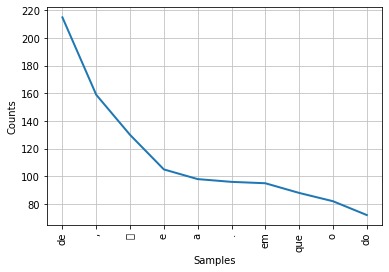

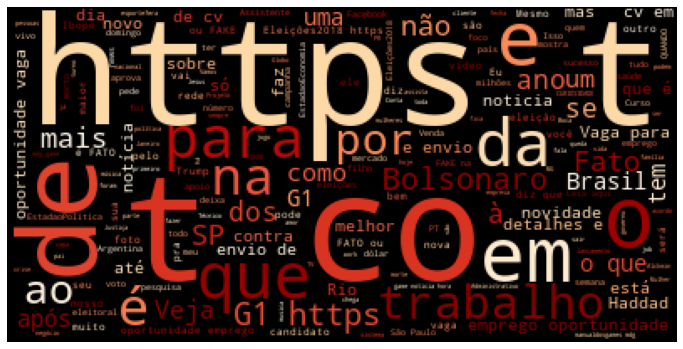

In [16]:
for i, (k, v) in enumerate(words_sentiment.items()):
    print(f'O gráfico de frequências  e a representação em nuvens de palavras do sentimento {i} é : \n\n ')
    print_freq_word(v)
    print(3*'\n')

### Conclusões:

- Uma das conclusões óbivas vinda da EDA  os emojis tem relação direta com os sentimentos 0 e 1, já visivel no primeiro gráfico 
- Vendo os tweets amostrados para sentimento 2 poderiam ser enquadrados como tweets neutros em relação, apesar de considerar que #Trabalho e #Oportunidade 
- A presença do emoji condiciona qual sentimento do tweet tem. 


## 2.Processamento dos Dados com Machine Learning tradcional

Vamos adotar um desenvolvimento iterartivo. Partindo do baseline modificando menos o possível e construindo a melhor pipeline. A seequencia será criar uma primeira baseline, e depois ir aplicando processamentos para remover stopwords até mostrar um modelo que funcione efetivamente.

### 2.1 Usando xgboost e TDFVectorizer

In [17]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearnex import patch_sklearn, unpatch_sklearn 


In [18]:


tfidf = TfidfVectorizer()
xgb = XGBClassifier(learning_rate=0.01, n_estimators=100, n_jobs=-1)

tfidf_xgb = Pipeline([
    ('tfidf', tfidf),
    ('xgb', xgb)
])
tfidf_xgb


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('xgb', XGBClassifier(learning_rate=0.01, n_jobs=-1))])

In [19]:
X = df['tweet_text']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.20, random_state=1)

In [20]:
import time

start = time.time()
patch_sklearn()
tfidf_xgb.fit(X_train , y_train)
elapse = time.time() - start
print(f'elapsed: {elapse} segundos')
tfidf_xgb

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


elapsed: 69.85927772521973 segundos


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('xgb',
                 XGBClassifier(learning_rate=0.01, n_jobs=-1,
                               objective='multi:softprob'))])

In [21]:
patch_sklearn()
y_pred_tfidf_xgb = tfidf_xgb.predict(X_test)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [22]:
print(classification_report(y_test, y_pred_tfidf_xgb, 
                      target_names=['Sentimento 0',
                                   'Sentimento 1',
                                   'Sentimento 2']))


              precision    recall  f1-score   support

Sentimento 0       0.70      0.34      0.46      6237
Sentimento 1       0.55      0.68      0.61      6395
Sentimento 2       0.77      0.99      0.87      6368

    accuracy                           0.67     19000
   macro avg       0.67      0.67      0.65     19000
weighted avg       0.67      0.67      0.65     19000



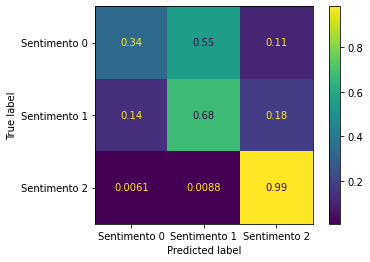

In [23]:
# Mostra a matriz de confusão 
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_tfidf_xgb, display_labels =['Sentimento 0',
                                   'Sentimento 1',
                                   'Sentimento 2'], normalize = 'true')

### 2.2 Usando xgboost e Word2Vec

Esta abordagem foi inspirado pelo [ethan8181](http://ethen8181.github.io/machine-learning/keras/text_classification/word2vec_text_classification.html), mas fazendo o ajuste para usar somente arrays do numpy para funcionar nossa abordagem. **Por equanto, não foia usado nenhum tipo de préprocessamento para retirar stopwords and pontuações do saco de palavras**

In [24]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearnex import patch_sklearn, unpatch_sklearn 

from gensim.test.utils import common_texts
from gensim.sklearn_api import W2VTransformer


In [25]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from gensim.models import Word2Vec


class GensimWord2VecVectorizer(BaseEstimator, TransformerMixin):
    """
    Word vectors are averaged across to create the document-level vectors/features.
    gensim's own gensim.sklearn_api.W2VTransformer doesn't support out of vocabulary words,
    hence we roll out our own.
    All the parameters are gensim.models.Word2Vec's parameters.
    https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec
    """

    def __init__(self, size=100, alpha=0.025, window=5, min_count=5, max_vocab_size=None,
                 sample=0.001, seed=1, workers=3, min_alpha=0.0001, sg=0, hs=0, negative=5,
                 ns_exponent=0.75, cbow_mean=1, hashfxn=hash, iter=5, null_word=0,
                 trim_rule=None, sorted_vocab=1, batch_words=10000, compute_loss=False,
                 callbacks=(), max_final_vocab=None):
        self.size = size
        self.alpha = alpha
        self.window = window
        self.min_count = min_count
        self.max_vocab_size = max_vocab_size
        self.sample = sample
        self.seed = seed
        self.workers = workers
        self.min_alpha = min_alpha
        self.sg = sg
        self.hs = hs
        self.negative = negative
        self.ns_exponent = ns_exponent
        self.cbow_mean = cbow_mean
        self.hashfxn = hashfxn
        self.iter = iter
        self.null_word = null_word
        self.trim_rule = trim_rule
        self.sorted_vocab = sorted_vocab
        self.batch_words = batch_words
        self.compute_loss = compute_loss
        self.callbacks = callbacks
        self.max_final_vocab = max_final_vocab

    def fit(self, X, y=None):
        self.model_ = Word2Vec(
            sentences=X, corpus_file=None,
            size=self.size, alpha=self.alpha, window=self.window, min_count=self.min_count,
            max_vocab_size=self.max_vocab_size, sample=self.sample, seed=self.seed,
            workers=self.workers, min_alpha=self.min_alpha, sg=self.sg, hs=self.hs,
            negative=self.negative, ns_exponent=self.ns_exponent, cbow_mean=self.cbow_mean,
            hashfxn=self.hashfxn, iter=self.iter, null_word=self.null_word,
            trim_rule=self.trim_rule, sorted_vocab=self.sorted_vocab, batch_words=self.batch_words,
            compute_loss=self.compute_loss, callbacks=self.callbacks,
            max_final_vocab=self.max_final_vocab)
        return self

    def transform(self, X):
        X_embeddings = np.array([self._get_embedding(words) for words in X])
        return X_embeddings

    def _get_embedding(self, words):
        valid_words = [word for word in words if word in self.model_.wv.vocab]
        if valid_words:
            embedding = np.zeros((len(valid_words), self.size), dtype=np.float32)
            for idx, word in enumerate(valid_words):
                embedding[idx] = self.model_.wv[word]

            return np.mean(embedding, axis=0)
        else:
            return np.zeros(self.size)



In [26]:


gensim_word2vec_tr = GensimWord2VecVectorizer(size=50, min_count=3, sg=1, alpha=0.025, iter=10)
xgb = XGBClassifier(learning_rate=0.01, n_estimators=100, n_jobs=-1)
w2v_xgb = Pipeline([
    ('w2v', gensim_word2vec_tr),
    ('xgb', xgb)
])
w2v_xgb


Pipeline(steps=[('w2v',
                 GensimWord2VecVectorizer(iter=10, min_count=3, sg=1, size=50)),
                ('xgb', XGBClassifier(learning_rate=0.01, n_jobs=-1))])

In [27]:
X = df['tweet_text']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.20, random_state=1)

In [28]:
import time

start = time.time()
patch_sklearn()
w2v_xgb.fit(X_train.values, y_train.values)
elapse = time.time() - start
print(f'elapsed: {elapse} segundos')
w2v_xgb

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


elapsed: 135.9139940738678 segundos


Pipeline(steps=[('w2v',
                 GensimWord2VecVectorizer(iter=10, min_count=3, sg=1, size=50)),
                ('xgb',
                 XGBClassifier(learning_rate=0.01, n_jobs=-1,
                               objective='multi:softprob'))])

In [29]:
y_pred_w2v_xgb = w2v_xgb.predict(X_test.to_numpy())


In [30]:
print(classification_report(y_test, y_pred_w2v_xgb, 
                      target_names=['Sentimento 0',
                                   'Sentimento 1',
                                   'Sentimento 2']))


              precision    recall  f1-score   support

Sentimento 0       0.86      0.78      0.82      6237
Sentimento 1       0.76      0.77      0.76      6395
Sentimento 2       0.85      0.91      0.88      6368

    accuracy                           0.82     19000
   macro avg       0.82      0.82      0.82     19000
weighted avg       0.82      0.82      0.82     19000



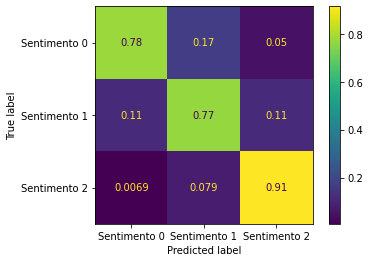

In [31]:
# Mostra a matriz de confusão 
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_w2v_xgb, display_labels =['Sentimento 0',
                                   'Sentimento 1',
                                   'Sentimento 2'], normalize = 'true')

### 2.3 Usando xgboost e TDFVectorizer usando remoção das palavras stopword vericando 

In [32]:
import nltk
from nltk import word_tokenize

from nltk.probability import FreqDist
import urllib.request
from matplotlib import pyplot as plt
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/antoniataveira/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/antoniataveira/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [49]:
stop_words = stopwords.words('portuguese')


In [34]:
print(len(stop_words))

204


In [50]:
df_stopword =  df.copy()

df_stopword['clean_tweet'] = df_stopword['tweet_text'].apply(lambda x: ' '.join([word for word in x.split() if (word not in (stop_words)) or (word.isalpha())]))

In [51]:
df_stopword['clean_tweet']

0        Rio elege maior bancada policial de sua histór...
1        fiquei tão triste quando eu vi o preço da câme...
2        Para Theresa May, seu plano para o Brexit é a ...
3        caralho eu quero proteger a danielly em um pot...
4                               @SiCaetano_ viva o caos :)
                               ...                        
94995    Cuba e defensor de direitos humanos se unem co...
94996    #Oportunidade ➡️ Venha fazer parte da nossa eq...
94997    @96syoo EU SEI 😭😭 é por isso que significa mui...
94998              @louistsexhes N te conheço mas posta :D
94999                  meu deus :( https://t.co/BlXazxZeKq
Name: clean_tweet, Length: 95000, dtype: object

In [52]:
#gerando os conjuntos teste e treino da base de dados

X = df_stopword['clean_tweet']
y = df_stopword['sentiment']
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.20, random_state=1) 




In [58]:
tfidf = TfidfVectorizer()
xgb = XGBClassifier(learning_rate=0.01, n_estimators=100, n_jobs=-1)

tfidf_xgb_stopword = Pipeline([
    ('tfidf', tfidf),
    ('xgb', xgb)
], verbose = 2)
tfidf_xgb_stopword


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('xgb', XGBClassifier(learning_rate=0.01, n_jobs=-1))],
         verbose=2)

In [60]:
import time

start = time.time()
patch_sklearn()
tfidf_xgb_stopword.fit(X_train , y_train)
elapse = time.time() - start
print(f'elapsed: {elapse} segundos')
tfidf_xgb

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


[Pipeline] ............. (step 1 of 2) Processing tfidf, total=   2.0s
[Pipeline] ............... (step 2 of 2) Processing xgb, total= 1.1min
elapsed: 65.38879203796387 segundos


Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('xgb',
                 XGBClassifier(learning_rate=0.01, n_jobs=-1,
                               objective='multi:softprob'))])

In [61]:
patch_sklearn()
y_pred_tfidf_xgb_stopword = tfidf_xgb_stopword.predict(X_test)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [62]:
print(classification_report(y_test, y_pred_tfidf_xgb_stopword, 
                      target_names=['Sentimento 0',
                                   'Sentimento 1',
                                   'Sentimento 2']))


              precision    recall  f1-score   support

Sentimento 0       0.70      0.34      0.46      6237
Sentimento 1       0.55      0.68      0.61      6395
Sentimento 2       0.77      0.99      0.87      6368

    accuracy                           0.67     19000
   macro avg       0.67      0.67      0.65     19000
weighted avg       0.67      0.67      0.65     19000



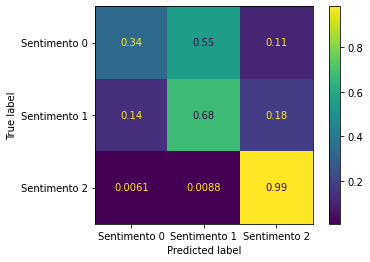

In [64]:
# Mostra a matriz de confusão 
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_tfidf_xgb_stopword, display_labels =['Sentimento 0',
                                   'Sentimento 1',
                                   'Sentimento 2'], normalize = 'true')


**Conclusões**
 - [x] A retiurada das stopwords do nosso dataset melhorou os resultados para detectar o sentimento 2, que seria caracterizados como o viés neutro;
 - [ ] Os resultados para analisar os senitimentos 0 e 1 piorou me relação aos modelos testados usadno XGBoost e TFIDF ou XGBoost e Word2Vec
 

##### $\color{red}{\text{UM EXPERIMENTO COM WORD TONEKENIZER}}$

In [43]:
df_stopword =  df.copy()


df_stopword['tweet_tokenized'] = df_stopword['tweet_text'].apply(lambda x : word_tokenize(x) )
#df_stopword['tweet_text'].apply(lambda x: [word for word in x if word not in (stop_words)])


In [44]:
df_stopword

id                                         tweet_text  \
0      1049721159292346368  Rio elege maior bancada policial de sua histór...   
1      1046251157025423360  fiquei tão triste quando eu vi o preço da câme...   
2      1041744620206653440  Para Theresa May, seu plano para o Brexit é a ...   
3      1046937084727107589  caralho eu quero proteger a danielly em um pot...   
4      1047326854229778432                         @SiCaetano_ viva o caos :)   
...                    ...                                                ...   
94995  1041831666883321856  Cuba e defensor de direitos humanos se unem co...   
94996  1032352892194369536  #Oportunidade ➡️ Venha fazer parte da nossa eq...   
94997  1046785538542440448  @96syoo EU SEI 😭😭 é por isso que significa mui...   
94998  1045457469110177792            @louistsexhes N te conheço mas posta :D   
94999  1046239135286136832                meu deus :( https://t.co/BlXazxZeKq   

                           tweet_date  sentiment     query_used  \
0      Tue Oct 09 18:00:01 +0000 2018          2          folha   
1      Sun Sep 30 04:11:28 +0000 2018          0             :(   
2      Mon Sep 17 17:44:06 +0000 2018          2          exame   
3      Tue Oct 02 01:37:06 +0000 2018          0             :(   
4      Wed Oct 03 03:25:55 +0000 2018          1             :)   
...                               ...        ...            ...   
94995  Mon Sep 17 23:30:00 +0000 2018          2   jornaloglobo   
94996  Wed Aug 22 19:44:44 +0000 2018          2  #oportunidade   
94997  Mon Oct 01 15:34:55 +0000 2018          0             :(   
94998  Thu Sep 27 23:37:38 +0000 2018          1             :)   
94999  Sun Sep 30 03:23:42 +0000 2018          0             :(   

                                         tweet_tokenized  
0      [Rio, elege, maior, bancada, policial, de, sua...  
1      [fiquei, tão, triste, quando, eu, vi, o, preço...  
2      [Para, Theresa, May, ,, seu, plano, para, o, B...  
3      [caralho, eu, quero, proteger, a, danielly, em...  
4                   [@, SiCaetano_, viva, o, caos, :, )]  
...                                                  ...  
94995  [Cuba, e, defensor, de, direitos, humanos, se,...  
94996  [#, Oportunidade, ➡️, Venha, fazer, parte, da,...  
94997  [@, 96syoo, EU, SEI, 😭😭, é, por, isso, que, si...  
94998  [@, louistsexhes, N, te, conheço, mas, posta, ...  
94999     [meu, deus, :, (, https, :, //t.co/BlXazxZeKq]  

[95000 rows x 6 columns]

In [45]:
df_stopword['tweet_tokenized'].apply(lambda x : [word for word in x if word not in (stop_words)])

0        [Rio, elege, maior, bancada, policial, históri...
1        [fiquei, tão, triste, vi, preço, câmera, :, (,...
2        [Para, Theresa, May, ,, plano, Brexit, única, ...
3        [caralho, quero, proteger, danielly, pote, tad...
4                        [@, SiCaetano_, viva, caos, :, )]
                               ...                        
94995    [Cuba, defensor, direitos, humanos, unem, cont...
94996    [#, Oportunidade, ➡️, Venha, fazer, parte, equ...
94997    [@, 96syoo, EU, SEI, 😭😭, significa, !, !, To, ...
94998           [@, louistsexhes, N, conheço, posta, :, D]
94999            [deus, :, (, https, :, //t.co/BlXazxZeKq]
Name: tweet_tokenized, Length: 95000, dtype: object

### 2.4 Usando Xgboost e Word2Vec sem as stopwords
Neste trecho a usaremos o dataset sem stopwords com o Word2Vec  e chegar a resultado.

In [65]:
X = df_stopword['clean_tweet']
y = df_stopword['sentiment']
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.20, random_state=1) 


In [67]:
gensim_word2vec_tr_ = GensimWord2VecVectorizer(size=50, min_count=3, sg=1, alpha=0.025, iter=10)
xgb = XGBClassifier(learning_rate=0.01, n_estimators=100, n_jobs=-1)
w2v_xgb_stopwords = Pipeline([
    ('w2v', gensim_word2vec_tr),
    ('xgb', xgb)
], verbose = 5)
w2v_xgb_stopwords


Pipeline(steps=[('w2v',
                 GensimWord2VecVectorizer(iter=10, min_count=3, sg=1, size=50)),
                ('xgb', XGBClassifier(learning_rate=0.01, n_jobs=-1))],
         verbose=5)

In [68]:
import time

start = time.time()
patch_sklearn()
w2v_xgb_stopwords.fit(X_train.to_numpy(), y_train.to_numpy())
elapse = time.time() - start
print(f'elapsed: {elapse} segundos')
w2v_xgb_stopwords;

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


[Pipeline] ............... (step 1 of 2) Processing w2v, total= 1.2min
[Pipeline] ............... (step 2 of 2) Processing xgb, total= 1.4min
elapsed: 154.56919384002686 segundos


In [69]:
patch_sklearn()
y_pred_w2v_xgb_stopword = w2v_xgb_stopwords.predict(X_test.values)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [70]:
print(classification_report(y_test, y_pred_w2v_xgb_stopword, 
                      target_names=['Sentimento 0',
                                   'Sentimento 1',
                                   'Sentimento 2']))


              precision    recall  f1-score   support

Sentimento 0       0.86      0.79      0.82      6237
Sentimento 1       0.80      0.79      0.79      6395
Sentimento 2       0.87      0.96      0.91      6368

    accuracy                           0.84     19000
   macro avg       0.84      0.84      0.84     19000
weighted avg       0.84      0.84      0.84     19000



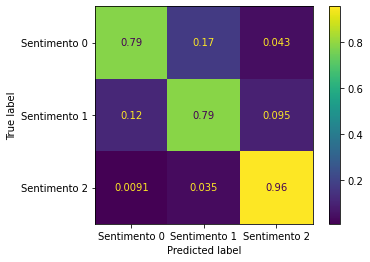

In [71]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_w2v_xgb_stopword, display_labels =['Sentimento 0',
                                   'Sentimento 1',
                                   'Sentimento 2'], normalize = 'true')

**Conclusões** 
- [X] A retiurada das stopwords do nosso dataset melhorou os resultados para detectar o sentimento 2 e 1, enqunato baixo de acurácia do sentimento 1 para 0.73, ao invés de 0.77;
- [X] Por enquanto, mostrou-se o melhor resultado global dos modelos testados.
- [X] Pelos resultados mostrados, a pipeline quando erra, escolhe calssifica tweets de sentimento 1 em 2 ou 0 na mesma probabilidade. 

### 2.5 Otimização do modelo XGBoost e Word2Vec sem as stopwords

In [93]:
# o nosso X treino e teste, quanto y treino e teste, vão ser reutilizados para a otmização do modelo.
gensim_word2vec_tr_ = GensimWord2VecVectorizer(size=50, min_count=3, sg=1, alpha=0.025, iter=10)
xgb = XGBClassifier(learning_rate=0.01, n_estimators=100, n_jobs=-1)
optmium = Pipeline([
    ('w2v', gensim_word2vec_tr),
    ('xgb', xgb)
], verbose = 5)
optmium

Pipeline(steps=[('w2v',
                 GensimWord2VecVectorizer(iter=10, min_count=3, sg=1, size=50)),
                ('xgb', XGBClassifier(learning_rate=0.01, n_jobs=-1))])

In [94]:
X = df_stopword['clean_tweet']
y = df_stopword['sentiment']
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.20, random_state=1) 



In [119]:
X_train = X_train.apply(lambda x : x.split())

In [121]:
#type(X_train.iloc[1].split())
#teste = X_train.apply(lambda x: x.encode('utf-8').split())
#.encode('utf-8').split()]
#teste
X_test = X_test.apply(lambda x : x.split())

In [129]:
from skopt import BayesSearchCV 
from sklearn.model_selection import RepeatedStratifiedKFold


cv = RepeatedStratifiedKFold(n_splits = 3 , n_repeats = 2 ,random_state=1)


In [130]:
parameter_grid = {'w2v__size': [48,96,144], 
                  'xgb__learning_rate':[0.001,0.01,0.1] ,
                  'xgb__n_estimators' : [50,100,200]}
                    

In [158]:
opt = BayesSearchCV(
    optmium,
   parameter_grid,
    cv = cv,
    n_jobs = -1,
    verbose = 3,
    n_iter = 20,
    random_state = 1
    
)

opt

BayesSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=3, random_state=1),
              estimator=Pipeline(steps=[('w2v',
                                         GensimWord2VecVectorizer(iter=10,
                                                                  min_count=3,
                                                                  sg=1,
                                                                  size=50)),
                                        ('xgb',
                                         XGBClassifier(learning_rate=0.01,
                                                       n_jobs=-1))]),
              n_iter=20, n_jobs=-1, random_state=1,
              search_spaces={'w2v__size': [48, 96, 144],
                             'xgb__learning_rate': [0.001, 0.01, 0.1],
                             'xgb__n_estimators': [50, 100, 200]},
              verbose=3)

In [159]:
from sklearnex import patch_sklearn, config_context
patch_sklearn()

with config_context(target_offload="gpu:0"):
   opt.fit(X_train, y_train)


Fitting 6 folds for each of 1 candidates, totalling 6 fits


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


[CV 1/6] END w2v__size=96, xgb__learning_rate=0.001, xgb__n_estimators=100;, score=0.836 total time= 3.6min
[CV 2/6] END w2v__size=96, xgb__learning_rate=0.001, xgb__n_estimators=100;, score=0.827 total time= 3.6min
[CV 3/6] END w2v__size=96, xgb__learning_rate=0.001, xgb__n_estimators=100;, score=0.842 total time= 3.6min
[CV 4/6] END w2v__size=96, xgb__learning_rate=0.001, xgb__n_estimators=100;, score=0.822 total time= 3.6min
[CV 5/6] END w2v__size=96, xgb__learning_rate=0.001, xgb__n_estimators=100;, score=0.821 total time= 3.6min
[CV 6/6] END w2v__size=96, xgb__learning_rate=0.001, xgb__n_estimators=100;, score=0.817 total time= 3.6min
Fitting 6 folds for each of 1 candidates, totalling 6 fits
[CV 3/6] END w2v__size=96, xgb__learning_rate=0.01, xgb__n_estimators=50;, score=0.845 total time= 2.3min
[CV 4/6] END w2v__size=96, xgb__learning_rate=0.01, xgb__n_estimators=50;, score=0.862 total time= 2.3min
[CV 2/6] END w2v__size=96, xgb__learning_rate=0.01, xgb__n_estimators=50;, score=

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Fitting 6 folds for each of 1 candidates, totalling 6 fits
[CV 1/6] END w2v__size=144, xgb__learning_rate=0.1, xgb__n_estimators=200;, score=0.958 total time= 9.7min
[CV 2/6] END w2v__size=144, xgb__learning_rate=0.1, xgb__n_estimators=200;, score=0.957 total time= 9.7min
[CV 6/6] END w2v__size=144, xgb__learning_rate=0.1, xgb__n_estimators=200;, score=0.952 total time= 9.7min
[CV 4/6] END w2v__size=144, xgb__learning_rate=0.1, xgb__n_estimators=200;, score=0.956 total time= 9.7min
[CV 5/6] END w2v__size=144, xgb__learning_rate=0.1, xgb__n_estimators=200;, score=0.954 total time= 9.7min
[CV 3/6] END w2v__size=144, xgb__learning_rate=0.1, xgb__n_estimators=200;, score=0.956 total time= 9.8min
Fitting 6 folds for each of 1 candidates, totalling 6 fits
[CV 1/6] END w2v__size=48, xgb__learning_rate=0.1, xgb__n_estimators=200;, score=0.926 total time= 3.5min
[CV 3/6] END w2v__size=48, xgb__learning_rate=0.1, xgb__n_estimators=200;, score=0.920 total time= 3.6min
[CV 4/6] END w2v__size=48, x

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Fitting 6 folds for each of 1 candidates, totalling 6 fits
[CV 1/6] END w2v__size=144, xgb__learning_rate=0.1, xgb__n_estimators=200;, score=0.958 total time= 8.8min
[CV 2/6] END w2v__size=144, xgb__learning_rate=0.1, xgb__n_estimators=200;, score=0.956 total time= 8.9min
[CV 6/6] END w2v__size=144, xgb__learning_rate=0.1, xgb__n_estimators=200;, score=0.954 total time= 8.9min
[CV 3/6] END w2v__size=144, xgb__learning_rate=0.1, xgb__n_estimators=200;, score=0.954 total time= 8.9min
[CV 5/6] END w2v__size=144, xgb__learning_rate=0.1, xgb__n_estimators=200;, score=0.954 total time= 8.9min
[CV 4/6] END w2v__size=144, xgb__learning_rate=0.1, xgb__n_estimators=200;, score=0.958 total time= 8.9min


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Fitting 6 folds for each of 1 candidates, totalling 6 fits
[CV 2/6] END w2v__size=144, xgb__learning_rate=0.1, xgb__n_estimators=200;, score=0.956 total time= 8.8min
[CV 1/6] END w2v__size=144, xgb__learning_rate=0.1, xgb__n_estimators=200;, score=0.954 total time= 8.8min
[CV 4/6] END w2v__size=144, xgb__learning_rate=0.1, xgb__n_estimators=200;, score=0.957 total time= 8.8min
[CV 5/6] END w2v__size=144, xgb__learning_rate=0.1, xgb__n_estimators=200;, score=0.955 total time= 8.8min
[CV 6/6] END w2v__size=144, xgb__learning_rate=0.1, xgb__n_estimators=200;, score=0.954 total time= 8.8min
[CV 3/6] END w2v__size=144, xgb__learning_rate=0.1, xgb__n_estimators=200;, score=0.954 total time= 8.9min


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Fitting 6 folds for each of 1 candidates, totalling 6 fits
[CV 1/6] END w2v__size=144, xgb__learning_rate=0.1, xgb__n_estimators=200;, score=0.959 total time= 8.9min
[CV 4/6] END w2v__size=144, xgb__learning_rate=0.1, xgb__n_estimators=200;, score=0.959 total time= 8.9min
[CV 5/6] END w2v__size=144, xgb__learning_rate=0.1, xgb__n_estimators=200;, score=0.952 total time= 8.8min
[CV 2/6] END w2v__size=144, xgb__learning_rate=0.1, xgb__n_estimators=200;, score=0.955 total time= 8.9min
[CV 6/6] END w2v__size=144, xgb__learning_rate=0.1, xgb__n_estimators=200;, score=0.956 total time= 8.8min
[CV 3/6] END w2v__size=144, xgb__learning_rate=0.1, xgb__n_estimators=200;, score=0.958 total time= 8.9min


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning:

The objective has been evaluated at this point before.



Fitting 6 folds for each of 1 candidates, totalling 6 fits
[CV 1/6] END w2v__size=144, xgb__learning_rate=0.1, xgb__n_estimators=200;, score=0.958 total time= 8.9min
[CV 2/6] END w2v__size=144, xgb__learning_rate=0.1, xgb__n_estimators=200;, score=0.956 total time= 8.9min
[CV 5/6] END w2v__size=144, xgb__learning_rate=0.1, xgb__n_estimators=200;, score=0.951 total time= 8.9min
[CV 6/6] END w2v__size=144, xgb__learning_rate=0.1, xgb__n_estimators=200;, score=0.955 total time= 8.9min
[CV 3/6] END w2v__size=144, xgb__learning_rate=0.1, xgb__n_estimators=200;, score=0.954 total time= 8.9min
[CV 4/6] END w2v__size=144, xgb__learning_rate=0.1, xgb__n_estimators=200;, score=0.958 total time= 8.9min


In [ ]:
# Fazer o fit da opt da maneira mais tradicional sem usar GPU
patch_sklearn()

opt.fit(X_train, y_train)

In [160]:
best_params = opt.best_params_
best_params

OrderedDict([('w2v__size', 144),
             ('xgb__learning_rate', 0.1),
             ('xgb__n_estimators', 200)])

In [161]:
opt.score(X_test, y_test)

0.962

In [162]:
y_opt_pred = opt.predict(X_test)

In [163]:
print(classification_report(y_test, y_opt_pred, 
                      target_names=['Sentimento 0',
                                   'Sentimento 1',
                                   'Sentimento 2']))


              precision    recall  f1-score   support

Sentimento 0       0.96      0.96      0.96      6237
Sentimento 1       0.95      0.95      0.95      6395
Sentimento 2       0.98      0.97      0.98      6368

    accuracy                           0.96     19000
   macro avg       0.96      0.96      0.96     19000
weighted avg       0.96      0.96      0.96     19000



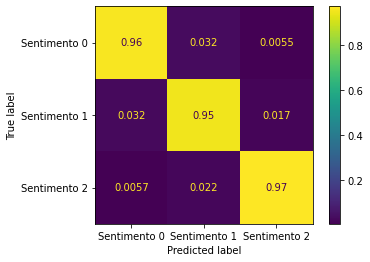

In [164]:
ConfusionMatrixDisplay.from_predictions(y_test,y_opt_pred, display_labels =['Sentimento 0',
                                   'Sentimento 1',
                                   'Sentimento 2'], normalize = 'true')

In [166]:
from sklearn.metrics import accuracy_score

print(f'Uma análise de overfitting rápida, mas não definitiva')

print(f'> acurácia de treino do modelo: {accuracy_score(y_train, opt.predict(X_train))  }')
print(f'> acurácia de teste do modelo: {accuracy_score(y_test, opt.predict(X_test))  }')

Uma análise de overfitting rápida, mas não definitiva
> acurácia de treino do modelo: 0.969328947368421
> acurácia de teste do modelo: 0.962


**Conclusões**
 - Quase ocorreu overfitting;
 - O modelo com os parâmetros otimizados conseguiu melhorar consideravelmente a capacidade distiguir os sentimentos 0 e 1, mas ocorreu uma leve queda para o sentimento 2

## 3. Geração das Predições do conjunto de validação 

In [177]:
df_valid = pd.read_csv('Victor_Taveira_nlp_degree.csv')
df_valid.sample(random_state = 1)

id                               tweet_text  \
2764  1049262627539603456  eu fiquei tão chateada com o Suplicy :(   

                          tweet_date query_used  
2764  Mon Oct 08 11:37:59 +0000 2018         :(

In [180]:

def no_stopwords(df,stop_words,coluna_fim,coluna_base):
    '''
        Esta função faz a limpeza do tweet retirando as pontuações e as stopwords retornando
        na coluna clean_tweet o texto filtrado a partir da coluna tweet_text
        
        df : o dataframe que vai ser processado
        
        stopwords : lista de palavras para filtrar as strings da coluna tweet_text
    '''
    df['coluna_fim'] = df['coluna_base'].apply(lambda x: ' '.join([word for word in x.split() if (word not in (stop_words)) or (word.isalpha())]))

In [170]:
'''
    Cria a coluna que vamos usar para input em opt
'''

df_valid['clean_tweet'] = df_valid['tweet_text'].apply(lambda x: ' '.join([word for word in x.split() if (word not in (stop_words)) or (word.isalpha())]))
 

    

In [171]:
df_valid.sample(random_state = 1)   
X_valid = df_valid['clean_tweet']


In [172]:
X_valid.values

array(['Apartamento Vila Mariana Praça Monteiro dos Santos O iMudou é especialista em imóveis e encontrou 7 oportunidades para a busca apartamento vila mariana praca monteiro dos santos. Temos as ofertas com o menor preço! :) https://t.co/8JlJ0N1Ewe',
       '@FalleNCS @BrasilGameShow quero 1x1 de scout. Dizem que dou muita bala cagada :)',
       'mais uma analógica no correio à minha espera :D Só falta receber duas lentes e começar a revelar em casa.',
       ...,
       '@nattvieiira de quem???? queria ver, eu sai por causa do lucas :(',
       "ASSASSIN'S CREED ORIGINS: ENFRENTANDO OS IRMÃOS ZÉ RUELA!!! : ): https://t.co/ohOkYL9T0T via @YouTube",
       'a gnt conversava muito mas paramos :( te acho mt engraçado cara KKKKK a gnt trocava mt meme'],
      dtype=object)

In [174]:
# predição dos tweets na base de validação 
patch_sklearn()

with config_context(target_offload="gpu:0"):
            results =  opt.predict(X_valid)
    #results = opt.predict(df_valid['clean_tweet'].apply(lambda x : x.split()))


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [232]:
print(results)

[1 1 1 ... 1 1 1]


In [214]:
df_results = pd.DataFrame(data = results, columns = ['predicao'])

In [176]:
'''
    Escreve o arquivo de entrega do porjeto seguindo
    o temeplate <nome>_<sobrenome>_<númeroTurma>_projeto_2_submissao.csv
'''
df_results.to_csv('Victor_Taveira_735_projeto_2_submissao.csv',index=False)

In [233]:
df_results.value_counts()

predicao
1           4880
0            116
2              4
dtype: int64

## 4. Considerações finais

1. À partir da retirada das stopwords na lista provida pela nltk, e posterior uso da stack word2vec aliado a xgboost tivemos uma acurácia de 96% média, com o sentimento 2 tendo resultados melhores
2. Foi usado a acurácia para essa comparação, pois dentro do proposto gostaria de identificar corretamente o sentimento é mais crucial, do que identificar erroneamente o sentimento do tweet. Entretanto, no contexto de censura no tweeter de tweets que violam as regras de usuário, o recall é mais importante para evitar problemas jurídicos ou perdas de imagem e financeiras para a compania
3. Posso sim usar esse modelo treinado para analisar outros textos, mas correndo grande risco de ser menos eficiente. O tweets possuem muito voabulário próprio e a utilização de emojis nesse processo. Seira necessário retreinar essa rede para aprender outros textos e contextos para melhorar muito mais 

In [234]:
df_results.value_counts()

predicao
1           4880
0            116
2              4
dtype: int64

4. Essa rede tem um viés positvo forte, ou seja, é mais provável que essa rede indiquem o sentimento 1. Inclusive abaixo usei três exemplos para demonstrar isso. Usarei os emojis característicos e uma manchete de jornal qualquer

In [235]:
opt.predict([':)'])

array([1])

In [236]:
opt.predict([':((((((((((((('])

array([1])

In [237]:
opt.predict(['Agregador de pesquisas: Projeção mostra Lula à frente em 16 Estados; Bolsonaro lidera em 8'])

array([1])